In [17]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [19]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

data_type = "kmer"
trans = "clr_scale"
numPc = [1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
folder_names = ['AGP_max_k6' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first10filter_TRUE','minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
file_names = ['rawfilter_TRUE']+ ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["6" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

metric_word = 'pearson' # 'auc_all'#''auc_all' # 'pearson' # 

classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'# #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
classifier = 'Regression'#"Random Forest"#'Regression'#"Random Forest"
select_columns_bool = True
title = 'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
special_name = "BMI prediction" #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

In [20]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale',
 'minerva_first50filter_TRUE_trans_clr_scale',
 'minerva_first100filter_TRUE_trans_clr_scale']

In [21]:
folder_names

['AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6']

In [22]:
df_metric = pd.DataFrame()

In [23]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale',
 'minerva_first50filter_TRUE_trans_clr_scale',
 'minerva_first100filter_TRUE_trans_clr_scale']

In [24]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        filename_temp = data_folder + folder_names[f] +"/cont_pred/"+ data_type + "_BatchCorrected_bmi_corrected_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] +"/class_pred/"+ data_type + "_BatchCorrected_"+ classifier_name + "_" + file_names[f] + "_classification_auc.pkl"
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        index = file_names[f]
        if metric_word == "auc_all":
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

In [25]:
df_metric

,rawfilter_TRUE_trans_clr_scale,minerva_first1filter_TRUE_trans_clr_scale,minerva_first2filter_TRUE_trans_clr_scale,minerva_first3filter_TRUE_trans_clr_scale,minerva_first4filter_TRUE_trans_clr_scale,minerva_first5filter_TRUE_trans_clr_scale,minerva_first6filter_TRUE_trans_clr_scale,minerva_first7filter_TRUE_trans_clr_scale,minerva_first8filter_TRUE_trans_clr_scale,minerva_first9filter_TRUE_trans_clr_scale,minerva_first10filter_TRUE_trans_clr_scale,minerva_first20filter_TRUE_trans_clr_scale,minerva_first30filter_TRUE_trans_clr_scale,minerva_first40filter_TRUE_trans_clr_scale,minerva_first50filter_TRUE_trans_clr_scale,minerva_first100filter_TRUE_trans_clr_scale
0,0.230212,0.218293,0.219156,0.217978,0.228025,0.205450,0.210259,0.206489,0.185696,0.205021,0.205183,0.209838,0.205603,0.179037,0.169988,0.124558
1,0.204323,0.237911,0.237787,0.238230,0.201493,0.230774,0.228228,0.228873,0.226288,0.228983,0.226031,0.185450,0.166714,0.149070,0.132645,0.097503
2,0.214889,0.246374,0.246307,0.246452,0.212293,0.242116,0.241041,0.240877,0.239425,0.241383,0.239304,0.194272,0.187738,0.166449,0.158204,0.135924
3,0.209751,0.281264,0.281022,0.282537,0.207951,0.275351,0.276825,0.271515,0.260563,0.273190,0.271399,0.190163,0.178938,0.162002,0.150316,0.117424
4,0.220855,0.257295,0.257236,0.255974,0.219371,0.250449,0.252217,0.248772,0.246013,0.245310,0.245706,0.205794,0.194553,0.171037,0.160078,0.128781
5,0.198615,0.233097,0.232240,0.233144,0.193812,0.222546,0.224777,0.225169,0.222198,0.225968,0.224283,0.177335,0.171858,0.149708,0.153199,0.110018
6,0.199193,0.235971,0.235916,0.235488,0.194272,0.224539,0.225264,0.219324,0.220287,0.218387,0.220057,0.179114,0.165642,0.151625,0.147247,0.112348
7,0.229219,0.217730,0.217655,0.216092,0.228930,0.212471,0.212382,0.210676,0.195445,0.209461,0.207566,0.208880,0.182623,0.167118,0.169230,0.113301
8,0.210252,0.237969,0.237241,0.237194,0.206968,0.230923,0.228957,0.229849,0.181788,0.229140,0.226225,0.186485,0.172736,0.154009,0.136763,0.124919
9,0.230503,0.229046,0.229175,0.227994,0.231822,0.221155,0.219342,0.216928,0.213229,0.217347,0.215354,0.207045,0.193333,0.176207,0.171420,0.132496


In [26]:
df_metric

,rawfilter_TRUE_trans_clr_scale,minerva_first1filter_TRUE_trans_clr_scale,minerva_first2filter_TRUE_trans_clr_scale,minerva_first3filter_TRUE_trans_clr_scale,minerva_first4filter_TRUE_trans_clr_scale,minerva_first5filter_TRUE_trans_clr_scale,minerva_first6filter_TRUE_trans_clr_scale,minerva_first7filter_TRUE_trans_clr_scale,minerva_first8filter_TRUE_trans_clr_scale,minerva_first9filter_TRUE_trans_clr_scale,minerva_first10filter_TRUE_trans_clr_scale,minerva_first20filter_TRUE_trans_clr_scale,minerva_first30filter_TRUE_trans_clr_scale,minerva_first40filter_TRUE_trans_clr_scale,minerva_first50filter_TRUE_trans_clr_scale,minerva_first100filter_TRUE_trans_clr_scale
0,0.230212,0.218293,0.219156,0.217978,0.228025,0.205450,0.210259,0.206489,0.185696,0.205021,0.205183,0.209838,0.205603,0.179037,0.169988,0.124558
1,0.204323,0.237911,0.237787,0.238230,0.201493,0.230774,0.228228,0.228873,0.226288,0.228983,0.226031,0.185450,0.166714,0.149070,0.132645,0.097503
2,0.214889,0.246374,0.246307,0.246452,0.212293,0.242116,0.241041,0.240877,0.239425,0.241383,0.239304,0.194272,0.187738,0.166449,0.158204,0.135924
3,0.209751,0.281264,0.281022,0.282537,0.207951,0.275351,0.276825,0.271515,0.260563,0.273190,0.271399,0.190163,0.178938,0.162002,0.150316,0.117424
4,0.220855,0.257295,0.257236,0.255974,0.219371,0.250449,0.252217,0.248772,0.246013,0.245310,0.245706,0.205794,0.194553,0.171037,0.160078,0.128781
5,0.198615,0.233097,0.232240,0.233144,0.193812,0.222546,0.224777,0.225169,0.222198,0.225968,0.224283,0.177335,0.171858,0.149708,0.153199,0.110018
6,0.199193,0.235971,0.235916,0.235488,0.194272,0.224539,0.225264,0.219324,0.220287,0.218387,0.220057,0.179114,0.165642,0.151625,0.147247,0.112348
7,0.229219,0.217730,0.217655,0.216092,0.228930,0.212471,0.212382,0.210676,0.195445,0.209461,0.207566,0.208880,0.182623,0.167118,0.169230,0.113301
8,0.210252,0.237969,0.237241,0.237194,0.206968,0.230923,0.228957,0.229849,0.181788,0.229140,0.226225,0.186485,0.172736,0.154009,0.136763,0.124919
9,0.230503,0.229046,0.229175,0.227994,0.231822,0.221155,0.219342,0.216928,0.213229,0.217347,0.215354,0.207045,0.193333,0.176207,0.171420,0.132496


In [27]:
df_metric.columns
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

Index(['rawfilter_TRUE_trans_clr_scale',
       'minerva_first1filter_TRUE_trans_clr_scale',
       'minerva_first2filter_TRUE_trans_clr_scale',
       'minerva_first3filter_TRUE_trans_clr_scale',
       'minerva_first4filter_TRUE_trans_clr_scale',
       'minerva_first5filter_TRUE_trans_clr_scale',
       'minerva_first6filter_TRUE_trans_clr_scale',
       'minerva_first7filter_TRUE_trans_clr_scale',
       'minerva_first8filter_TRUE_trans_clr_scale',
       'minerva_first9filter_TRUE_trans_clr_scale',
       'minerva_first10filter_TRUE_trans_clr_scale',
       'minerva_first20filter_TRUE_trans_clr_scale',
       'minerva_first30filter_TRUE_trans_clr_scale',
       'minerva_first40filter_TRUE_trans_clr_scale',
       'minerva_first50filter_TRUE_trans_clr_scale',
       'minerva_first100filter_TRUE_trans_clr_scale'],
      dtype='object')

In [28]:
select_columns_bool = False

In [29]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
select_labels = ["raw","MINERVA","Refactor","SmartSVA"]

#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

In [30]:
select_labels

['raw', 'MINERVA', 'Refactor', 'SmartSVA']

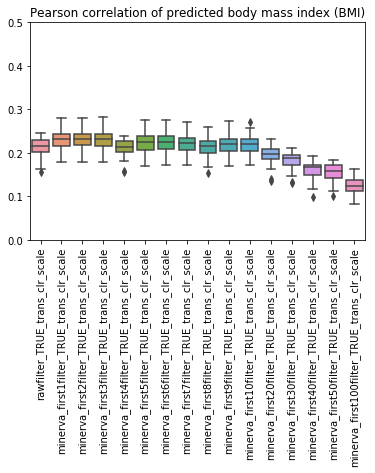

In [31]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(0, 0.5))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans + '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans +  '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [32]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'